## 线性回归

- 正则化框架: $$ L(W) + \lambda P(W)$$

> 其中L为Loss Function, P为penalty(惩罚函数)

- 目标: $\arg\min\limits_{W} [L(W) + \lambda P(W)]$

- 正则化方式

- L1: Lasso : $$P(W) = \lVert W \rVert$$
- L2: Ridge : $$P(W) = \lVert W \rVert^2 = W^TW $$

$$ \begin{align}
\mathcal{J}(W)  =& \sum_{n=1}^N \lVert W^Tx_i - y_i\rVert^2 + \lambda W^TW\\
 =& (W^TX^T-Y^T)(XW-Y) + \lambda W^TW\\
 =& W^TX^TXW-W^TX^T - Y^TXW + Y^TY + \lambda W^TW\\
 =& W^T(X^TX + \lambda I)W- 2W^TX^TY + Y^TY
\end{align}
$$


- 对W求最小, 需要对其求导: $$ \frac {\delta J(W)} {\delta W} = 2(X^TX + \lambda I)W- 2X^TY = 0 $$

- 可得: $$\hat{W} = (X^TX + \lambda I)^{-1}X^TY (1)$$

> 其中X^TX为半正定, 加上 $\lambda I$后必然正定, 即可逆

#### 最大后验估计(MAP)-贝叶斯角度

- 从MAP角度来看, 参数必然服从某个分布, 故假设 $W ~ N(0, \sigma^2_0)$

- 因此, 忽略 $P(y)$ 这个常值的影响, 可得: $$ \hat{W} = \arg\max\limits_{W} P(W|y) = \arg\max\limits_{W} \dfrac{P(y|W)P(W)}{P(y)} = \arg\max\limits_{W} P(y|W)P(W)$$

- 计算具体分布可得: $$ \hat{W} = \sum_{n=1}^N (y_i -  W^Tx_i)^2 \dfrac{\sigma^2}{\sigma^2_0} \lVert W\rVert^2$$

- 观察上式结果, 其与加了Ridge正则化的Loss Function一致, 上面的(1)式子

- 其中 $ \lambda = \dfrac{\sigma^2}{\sigma^2_0}$

> $ \sigma^2_0 = \sigma^2 $ 时, 就相当于 $\sigma^2_0$ 先验估计直接使用了后验的 $\sigma^2$ 的值, 故会使 $\lambda = 1$

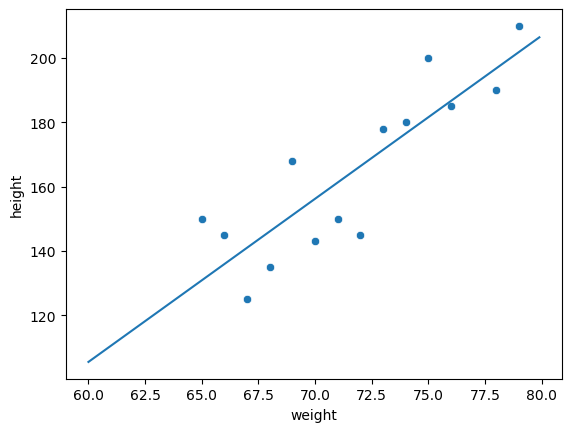

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender = 'gender'
weight = 'weight'
height = 'height'

dataUrl = '.\\heightWeightData.csv'

df = pd.read_csv(dataUrl)

# 规整数据
df = df[df[gender] == 1] 
df = df[df[height] < 240]
df = df.loc[:,[weight, height]]
df = df.drop_duplicates(subset=weight)

# X = b + w
X = df[weight].values
X = X.reshape(-1, 1)
B = np.ones((X.shape[0], 1))
Y = df[height].values
X=np.column_stack((B,X))

# 套用参数计算公式
A = np.matmul(X.T, X)
## 加入岭回归的与最小二乘法唯一不相同的一步
A = A + 0.1 * np.eye(len(A))
X = np.matmul(np.matrix(A).I, X.T)
W = np.matmul(X,Y)

# 绘图
xy = pd.DataFrame()
xy['x'] = np.arange(60, 80, 0.1)
xy['y'] = xy['x'].apply(lambda x: x*W[0,1] + W[0,0])
sns.scatterplot(data=df,x= weight, y = height)
sns.lineplot(data=xy, x = 'x', y='y')
plt.show()